In [1]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score, recall_score, mean_absolute_error, mean_squared_error
import numpy as np
import torch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#!pip install --upgrade pip
#!pip install torch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data import DataLoader, TensorDataset
import os

In [2]:
# import file with data
data_neg=pd.read_csv("/Users/sahanasurapureddy/Documents/Spring 2023/ADS/ADS PROJECT/TBI-neg/202-DOD-tts_all.csv")
data_neg.head()

,s1,s10,s100,s101,s102,s103,s104,s105,s106,s107,...,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
0,37.903318,-1.527729,-11.398395,0.865482,52.516006,21.304847,-2.181833,1.374595,-21.310018,16.521885,...,-17.159321,-76.845802,-34.535723,4.255768,-48.193126,-37.169141,-23.102742,-9.849711,29.341404,-4.872553
1,10.903520,-15.220259,12.634140,4.489170,32.097573,32.915970,27.414212,-16.516490,-1.060148,9.442842,...,-27.383751,-51.917022,-38.872302,-46.732517,-48.189742,-23.401379,5.620840,1.480930,27.082278,6.715085
2,2.550337,0.291069,-4.081274,3.444637,24.357616,10.594214,13.923210,20.733263,-9.182823,-12.867098,...,-13.728617,-1.795428,35.401089,18.706864,26.795974,-34.217082,2.316047,-8.520599,7.865749,1.061450
3,-9.263459,-7.865878,1.429628,13.534524,17.242307,26.241033,-6.169180,23.485398,27.513923,25.275845,...,0.337088,-0.095450,-11.620577,1.875657,-10.097397,-7.293893,-9.907946,-1.665926,22.015416,1.487141
4,14.116000,3.640032,0.340917,2.120754,13.540240,-5.234816,10.414816,7.506842,15.631177,14.559452,...,-7.815312,-24.041750,-8.347774,-10.396751,-18.348020,-1.327575,-8.726569,-10.432880,3.809807,1.356077


In [3]:
#Handle missing values
data_neg.dropna(inplace=True)

In [4]:
#Remove duplicate values
data_neg.drop_duplicates(inplace=True)

In [5]:
#Finding null values
pd.isnull(data_neg).sum()

s1      0
s10     0
s100    0
s101    0
s102    0
       ..
s95     0
s96     0
s97     0
s98     0
s99     0
Length: 294, dtype: int64

In [6]:
#Cleaning null values
data_neg= data_neg.dropna(axis=0, how='any')
pd.isnull(data_neg).sum()

s1      0
s10     0
s100    0
s101    0
s102    0
       ..
s95     0
s96     0
s97     0
s98     0
s99     0
Length: 294, dtype: int64

In [7]:
data_neg.shape

(375, 294)

            s1       s10      s100      s101      s102      s103      s104  \
s1    1.000000  0.086661 -0.003689 -0.251482  0.002661 -0.085453 -0.086844   
s10   0.086661  1.000000 -0.066875 -0.095115 -0.159486 -0.151653 -0.136452   
s100 -0.003689 -0.066875  1.000000  0.186911  0.246575  0.418726  0.365017   
s101 -0.251482 -0.095115  0.186911  1.000000  0.422696  0.378830  0.390937   
s102  0.002661 -0.159486  0.246575  0.422696  1.000000  0.702683  0.514857   
...        ...       ...       ...       ...       ...       ...       ...   
s95   0.105758  0.106935 -0.010429 -0.080272 -0.041382 -0.113525 -0.020951   
s96   0.048795 -0.022339  0.274135  0.107339  0.061246  0.212360  0.217595   
s97   0.053277  0.006774  0.415466  0.318549  0.199219  0.206828  0.419155   
s98   0.132707 -0.136387  0.538473  0.124466  0.355814  0.522469  0.430295   
s99   0.005119 -0.117749  0.532634  0.154493  0.186599  0.314121  0.413524   

          s105      s106      s107  ...       s90       s91    

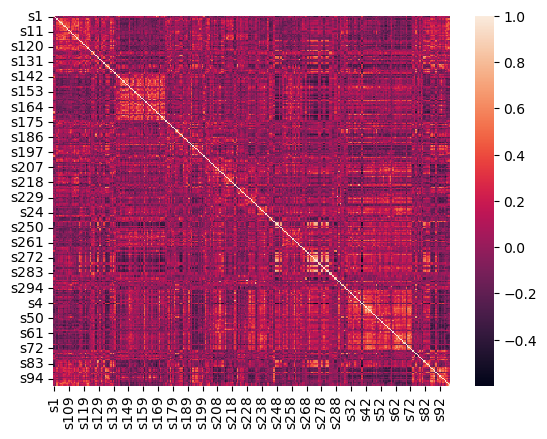

In [8]:
print(data_neg.corr())
# plotting correlation heatmap
dataplot=sb.heatmap(data_neg.corr())
  
# displaying heatmap
mp.show()

[ 37.90331809  -1.52772878 -11.39839486 ...   8.86165832  -1.87463944
  -9.7996544 ]
Average of heatmap: -0.005591018757362828


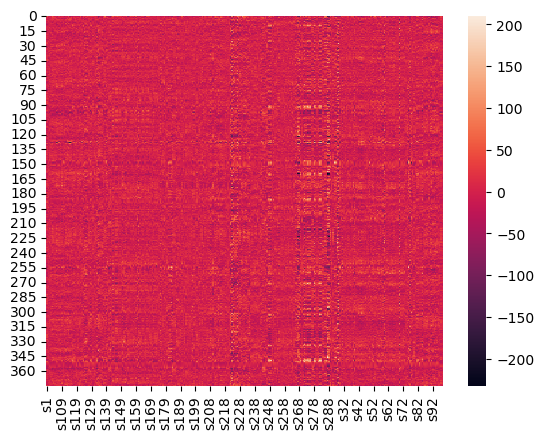

In [9]:
import seaborn as sns
import numpy as np

# Generate heatmap
#data = np.random.rand(10, 10)
#data = sns.load_dataset("C:/Users/akshi/Downloads/AD/202-DOD-tts_all.csv")
heatmap = sns.heatmap(data_neg)

# Get values of heatmap
heatmap_values = heatmap.get_children()[0].get_array()
print(heatmap_values)
# Compute average of values
heatmap_average = np.mean(heatmap_values)

print(f"Average of heatmap: {heatmap_average}")

In [10]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  
# import file with data
data_pos=pd.read_csv("/Users/sahanasurapureddy/Documents/Spring 2023/ADS/ADS PROJECT/TBI-pos/102-DOD-tts_all.csv")
data_pos.head()

,s001,s002,s003,s004,s005,s006,s007,s008,s009,s010,...,s285,s286,s287,s288,s289,s290,s291,s292,s293,s294
0,-44.441354,-121.028040,-6.175245,-5.837464,-1.571757,-32.785853,75.289992,-6.714133,12.516116,-11.998645,...,25.201131,27.832595,-49.995069,-61.012001,-22.297728,-17.843589,62.831756,-37.605550,-63.948435,-35.232924
1,-5.907855,29.076339,-28.448673,-15.335242,6.471229,108.591310,-13.857736,-15.139146,11.468082,12.512514,...,-24.081640,-34.833408,-17.396649,-27.027706,-4.498053,-0.226579,-21.637869,-19.037887,216.055567,71.566422
2,20.612283,-16.597787,47.098009,18.239656,44.814484,54.433324,86.797201,3.867489,-3.197224,-24.503937,...,43.176189,17.291592,4.275084,-2.879857,-48.065349,-4.830160,-27.366892,18.580621,33.347166,27.081123
3,8.505590,2.589306,-0.206133,-5.487313,5.284870,-51.929207,-29.627658,2.712678,6.718762,-1.396200,...,0.662548,-2.586391,-79.748566,-40.311163,-33.633017,-11.277811,-3.146153,-20.083122,-120.511227,-25.078817
4,-33.715475,-64.350447,-13.989697,16.038061,-4.686681,67.021612,127.668294,-21.417982,-3.972510,-1.188335,...,-20.848216,-9.494999,38.002673,17.915320,-30.097533,4.468472,3.248733,41.449646,8.740459,21.388491


          s001      s002      s003      s004      s005      s006      s007  \
s001  1.000000  0.435199 -0.142846  0.243725 -0.079076 -0.023238  0.037002   
s002  0.435199  1.000000  0.005417  0.115940  0.007515 -0.045435 -0.169808   
s003 -0.142846  0.005417  1.000000 -0.054579  0.376612  0.063515 -0.023200   
s004  0.243725  0.115940 -0.054579  1.000000 -0.030106 -0.000112  0.035909   
s005 -0.079076  0.007515  0.376612 -0.030106  1.000000  0.052336 -0.091877   
...        ...       ...       ...       ...       ...       ...       ...   
s290  0.164067  0.024409 -0.053080 -0.116832 -0.119649  0.010998  0.030215   
s291  0.148548 -0.118055 -0.234732  0.028349 -0.238183 -0.039179  0.189608   
s292  0.117316 -0.004861  0.301466  0.070595  0.181291  0.211970  0.087414   
s293 -0.032972 -0.003805 -0.020520 -0.038801  0.038972  0.707619  0.243965   
s294 -0.072262 -0.159171 -0.011749 -0.018138  0.058762  0.528002  0.192361   

          s008      s009      s010  ...      s285      s286    

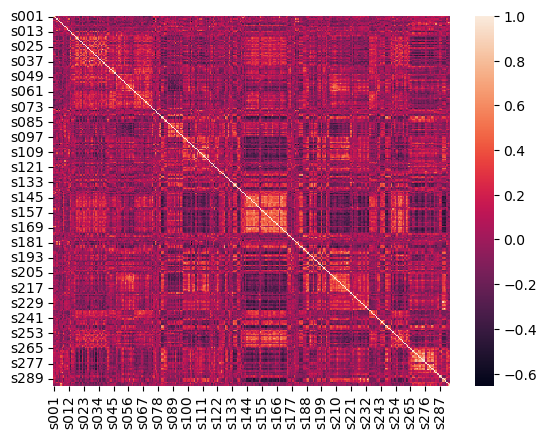

In [11]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  
# import file with data
data_pos=pd.read_csv("/Users/sahanasurapureddy/Documents/Spring 2023/ADS/ADS PROJECT/TBI-pos/102-DOD-tts_all.csv")

print(data_pos.corr())
# plotting correlation heatmap
dataplot=sb.heatmap(data_pos.corr())
  
# displaying heatmap
mp.show()

In [12]:
data_pos.shape

(375, 294)

In [13]:
#Handle missing values
data_pos.dropna(inplace=True)

In [14]:
#Remove duplicate values
data_pos.drop_duplicates(inplace=True)

In [15]:
#Finding null values
pd.isnull(data_pos).sum()

s001    0
s002    0
s003    0
s004    0
s005    0
       ..
s290    0
s291    0
s292    0
s293    0
s294    0
Length: 294, dtype: int64

In [16]:
#Cleaning null values
data_pos= data_pos.dropna(axis=0, how='any')
pd.isnull(data_pos).sum()

s001    0
s002    0
s003    0
s004    0
s005    0
       ..
s290    0
s291    0
s292    0
s293    0
s294    0
Length: 294, dtype: int64

          s001      s002      s003      s004      s005      s006      s007  \
s001  1.000000  0.435199 -0.142846  0.243725 -0.079076 -0.023238  0.037002   
s002  0.435199  1.000000  0.005417  0.115940  0.007515 -0.045435 -0.169808   
s003 -0.142846  0.005417  1.000000 -0.054579  0.376612  0.063515 -0.023200   
s004  0.243725  0.115940 -0.054579  1.000000 -0.030106 -0.000112  0.035909   
s005 -0.079076  0.007515  0.376612 -0.030106  1.000000  0.052336 -0.091877   
...        ...       ...       ...       ...       ...       ...       ...   
s290  0.164067  0.024409 -0.053080 -0.116832 -0.119649  0.010998  0.030215   
s291  0.148548 -0.118055 -0.234732  0.028349 -0.238183 -0.039179  0.189608   
s292  0.117316 -0.004861  0.301466  0.070595  0.181291  0.211970  0.087414   
s293 -0.032972 -0.003805 -0.020520 -0.038801  0.038972  0.707619  0.243965   
s294 -0.072262 -0.159171 -0.011749 -0.018138  0.058762  0.528002  0.192361   

          s008      s009      s010  ...      s285      s286    

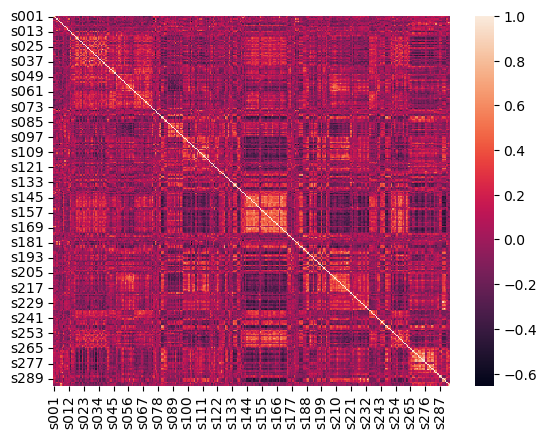

In [17]:
print(data_pos.corr())
# plotting correlation heatmap
dataplot=sb.heatmap(data_pos.corr())
  
# displaying heatmap
mp.show()



Plotting Correlation Heatmap & Displaying heatmap


[ -44.44135372 -121.0280397    -6.17524544 ...   29.11917598    0.47605702
  -22.30776167]
Average of heatmap: -0.018566843132070028


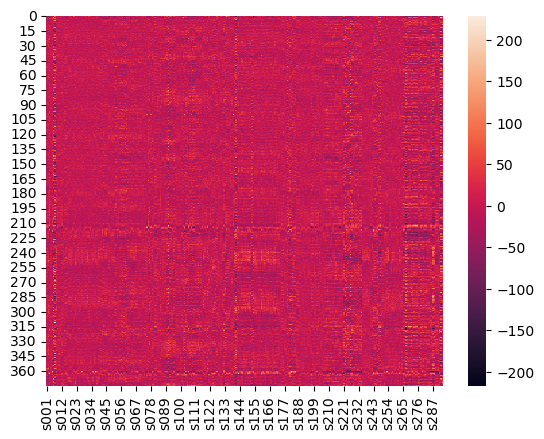

In [18]:
import seaborn as sns
import numpy as np

# Generate heatmap
#data = np.random.rand(10, 10)
#data = sns.load_dataset("C:/Users/akshi/Downloads/AD/202-DOD-tts_all.csv")
heatmap = sns.heatmap(data_pos)

# Get values of heatmap
heatmap_values = heatmap.get_children()[0].get_array()
print(heatmap_values)
# Compute average of values
heatmap_average = np.mean(heatmap_values)

print(f"Average of heatmap: {heatmap_average}")

/var/folders/fx/f28bzrdx5knctx31p9frmblh0000gn/T/ipykernel_55033/946719779.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()# Plot the correlation matrix as a heatmap


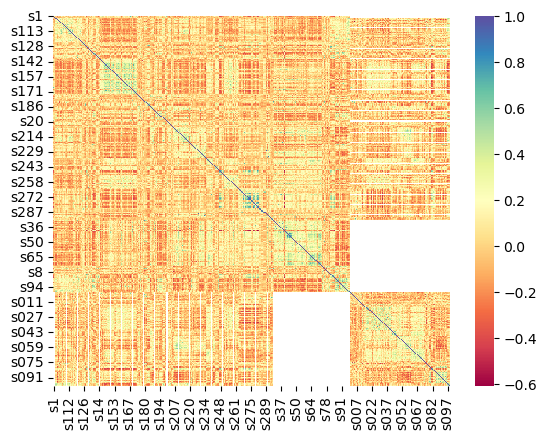

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix# Load the data into dataframes
ad_tbi_neg_df = pd.read_csv('/Users/sahanasurapureddy/Documents/Spring 2023/ADS/ADS PROJECT/TBI-neg/202-DOD-tts_all.csv')
ad_tbi_pos_df = pd.read_csv('/Users/sahanasurapureddy/Documents/Spring 2023/ADS/ADS PROJECT/TBI-pos/102-DOD-tts_all.csv')# Add a column to each dataframe to indicate the group
ad_tbi_neg_df['Group'] = 'TBI Negative'
ad_tbi_pos_df['Group'] = 'TBI Positive'# Merge the dataframes into a single dataframe

merged_df = pd.concat([ad_tbi_neg_df, ad_tbi_pos_df])# Calculate the correlation matrix
corr_matrix = merged_df.corr()# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='Spectral')# Show the plot
plt.show()



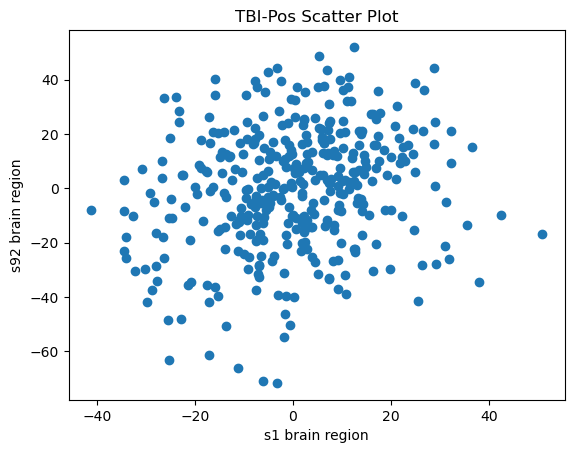

In [20]:
import matplotlib.pyplot as plt
x = data_neg['s1']
y = data_neg['s92']
#Create the scatter plot
plt.scatter(x, y)

# Set the title and axis labels
plt.title('TBI-Pos Scatter Plot')
plt.xlabel('s1 brain region')
plt.ylabel('s92 brain region')

# Show the plot
plt.show()


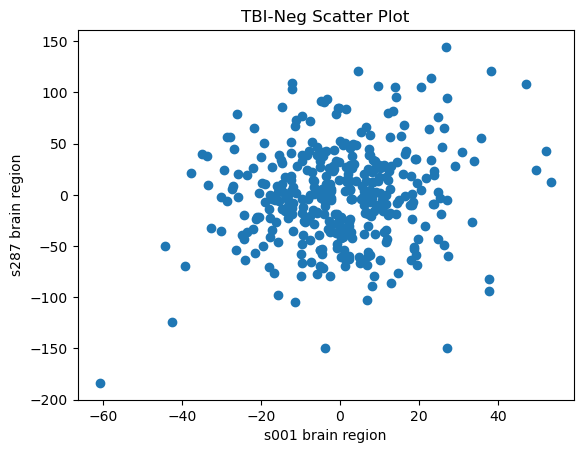

In [21]:
x = data_pos['s001']
y = data_pos['s287']
#Create the scatter plot
plt.scatter(x, y)

# Set the title and axis labels
plt.title('TBI-Neg Scatter Plot')
plt.xlabel('s001 brain region')
plt.ylabel('s287 brain region')

# Show the plot
plt.show()

# Checkpoint2: Time series deep learning model

Build a Time-serious Deep Learning Model using as a Classifier.
Input of the model are the time series from different brain region, output is weather TBI-Pos or TBI-Negative.
(Input: Multiple Sequences, Output: single label)
start with a fully connected neural network using PyTorc

In [22]:
# Load the two datasets
data_neg = pd.read_csv('/Users/sahanasurapureddy/Documents/Spring 2023/ADS/ADS PROJECT/TBI-neg/202-DOD-tts_all.csv')
data_pos = pd.read_csv('/Users/sahanasurapureddy/Documents/Spring 2023/ADS/ADS PROJECT/TBI-pos/102-DOD-tts_all.csv')

# Find the common brain regions between the two datasets
common_brain_regions = list(set(data_neg.columns) & set(data_pos.columns))

# Select only the common brain regions in both datasets
data1_common = data_neg[common_brain_regions]
#adding new column label which indicates value as 0 for TBI-Neg
data1_common.insert(0, 'Label', 0)
#saving the updated dataset to new csv file
data1_common.to_csv('updated_TBI-Neg.csv', index=False)

data2_common = data_pos[common_brain_regions]
#adding new column label which indicates value as 1 for TBI-Pos
data2_common.insert(0, 'Label', 1)
#saving the updated dataset to new csv file
data2_common.to_csv('updated_TBI-Pos.csv', index=False)



In [23]:
print('Common Brain Regions:', common_brain_regions)

Common Brain Regions: ['s267', 's281', 's137', 's290', 's246', 's129', 's293', 's115', 's182', 's285', 's227', 's154', 's252', 's135', 's118', 's239', 's261', 's230', 's247', 's292', 's136', 's175', 's216', 's234', 's241', 's242', 's253', 's153', 's157', 's110', 's271', 's213', 's287', 's268', 's197', 's187', 's147', 's119', 's127', 's161', 's174', 's208', 's222', 's109', 's226', 's221', 's238', 's167', 's249', 's205', 's164', 's288', 's102', 's215', 's195', 's220', 's274', 's126', 's152', 's100', 's248', 's294', 's128', 's193', 's211', 's240', 's113', 's181', 's257', 's191', 's219', 's280', 's170', 's177', 's132', 's194', 's186', 's254', 's112', 's156', 's269', 's176', 's155', 's204', 's236', 's262', 's183', 's228', 's165', 's145', 's218', 's104', 's134', 's282', 's244', 's103', 's278', 's108', 's180', 's124', 's284', 's162', 's214', 's279', 's212', 's210', 's237', 's232', 's149', 's286', 's141', 's202', 's245', 's150', 's277', 's173', 's259', 's169', 's201', 's283', 's276', 's209', '

In [24]:
data1_common.head()
data1_common.shape

(375, 196)

In [25]:
data2_common.head()
data2_common.shape

(375, 196)

In [26]:
# Combining  two datasets into a single DataFrame
combined_data = pd.concat([data1_common, data2_common], axis=0, ignore_index=True)

# Saving the combined dataset to a CSV file
combined_data.to_csv('combined_data.csv', index=False)
combined_data.head()
print("Combined_Data contains:",combined_data.shape)

Combined_Data contains: (750, 196)


In [27]:
#Reading data into dataframe
data = pd.read_csv('combined_data.csv')
data.head()

,Label,s267,s281,s137,s290,s246,s129,s293,s115,s182,...,s133,s255,s200,s263,s140,s233,s171,s131,s258,s106
0,0,-109.645204,10.572170,14.484800,13.933400,-17.658195,25.836512,-53.369841,-12.023799,-36.165508,...,-80.707863,-12.412160,-31.149039,-41.251873,-24.511815,11.059272,5.121141,14.579465,12.851317,-21.310018
1,0,11.852127,31.220356,27.963976,26.299922,-14.727878,-3.575568,0.106301,30.780204,-5.586861,...,-47.009456,-6.352368,22.795597,2.991223,-12.524920,39.690326,-3.484942,16.177526,-18.704095,-1.060148
2,0,32.627507,-36.630244,6.038517,10.871662,-14.737590,18.986013,6.166696,24.544329,8.276931,...,3.253287,-14.710841,-6.217650,-13.449700,11.918429,-3.188504,4.559987,9.708703,25.658923,-9.182823
3,0,-14.786213,-6.482210,18.577958,6.440752,9.775706,8.186551,30.708826,25.809798,-6.480415,...,16.157555,-1.682935,10.814379,-10.937848,-21.849952,-14.917706,-16.225689,24.946784,-12.932329,27.513923
4,0,42.348545,-25.069135,-5.021537,10.746880,-2.142315,-1.583319,-45.072683,-2.368310,-11.528851,...,1.118129,-13.857516,3.026675,-1.157168,-7.918170,48.474618,7.131179,6.151991,-1.642365,15.631177


In [28]:
#checking for null values
pd.isnull(data).sum()

Label    0
s267     0
s281     0
s137     0
s290     0
        ..
s233     0
s171     0
s131     0
s258     0
s106     0
Length: 196, dtype: int64

In [29]:
#checking if there are duplicated values
data.duplicated().sum()

0

In [30]:
# Load the time series data
data = pd.read_csv('combined_data.csv')
data.head()
data.shape

(750, 196)

In [31]:
# read the combined data from csv file
data = pd.read_csv('combined_data.csv')

# separate input and target variables
#X = data.iloc[:, :-1].values
#y = data.iloc[:, -1].values

X = data.iloc[:, 1:].values  # select all rows and all columns after the first
y = data.iloc[:, 0].values   # select all rows and the first column


# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# performing  PCA on each subject's data
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(StandardScaler().fit_transform(X_train))
X_test_pca = pca.transform(StandardScaler().fit_transform(X_test))

# converting numpy arrays to torch tensors
X_train_pca = torch.from_numpy(X_train_pca).float()
y_train = torch.from_numpy(y_train).float()
X_test_pca = torch.from_numpy(X_test_pca).float()
y_test = torch.from_numpy(y_test).float()

train_size_pca = X_train_pca.shape[0]
test_size_pca = X_test_pca.shape[0]

print("Train size :", y_train.shape[0])
print("Test size :", y_test.shape[0])

# create train and test loaders
train_data = torch.utils.data.TensorDataset(X_train_pca, y_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True)

print('Dataset size: {}'.format(len(train_loader)))


test_data = torch.utils.data.TensorDataset(X_test_pca, y_test)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=9, shuffle=False)

print('Dataset test size: {}'.format(len(test_loader)))

# define the model architecture
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(1, 16)
        self.fc2 = torch.nn.Linear(16, 32)
        self.fc3 = torch.nn.Linear(32, 1)
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# initiating the class into model
model = Net()

# define the loss function and optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# train the model
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print('Epoch %d, loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

# evaluate the model on the testing set
correct = 0
total = 0
y_true = []
y_pred = []
model.eval()
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        predicted = torch.round(outputs)
        total += labels.size(0)
        correct += (predicted == labels.unsqueeze(1)).sum().item()
        y_true += labels.tolist()
        y_pred += predicted.tolist()

accuracy = 100 * correct / total
print('Accuracy on the test set: %.2f%%' % accuracy)





Train size : 600
Test size : 150
Dataset size: 75
Dataset test size: 17
Epoch 1, loss: 0.689
Epoch 2, loss: 0.676
Epoch 3, loss: 0.671
Epoch 4, loss: 0.669
Epoch 5, loss: 0.665
Epoch 6, loss: 0.661
Epoch 7, loss: 0.661
Epoch 8, loss: 0.662
Epoch 9, loss: 0.660
Epoch 10, loss: 0.660
Epoch 11, loss: 0.663
Epoch 12, loss: 0.658
Epoch 13, loss: 0.658
Epoch 14, loss: 0.659
Epoch 15, loss: 0.658
Epoch 16, loss: 0.660
Epoch 17, loss: 0.661
Epoch 18, loss: 0.660
Epoch 19, loss: 0.659
Epoch 20, loss: 0.658
Epoch 21, loss: 0.659
Epoch 22, loss: 0.659
Epoch 23, loss: 0.658
Epoch 24, loss: 0.658
Epoch 25, loss: 0.658
Epoch 26, loss: 0.657
Epoch 27, loss: 0.658
Epoch 28, loss: 0.662
Epoch 29, loss: 0.658
Epoch 30, loss: 0.658
Epoch 31, loss: 0.658
Epoch 32, loss: 0.656
Epoch 33, loss: 0.656
Epoch 34, loss: 0.662
Epoch 35, loss: 0.657
Epoch 36, loss: 0.657
Epoch 37, loss: 0.656
Epoch 38, loss: 0.656
Epoch 39, loss: 0.659
Epoch 40, loss: 0.657
Epoch 41, loss: 0.657
Epoch 42, loss: 0.659
Epoch 43, los

In [32]:
# calculating precision, recall and F1 score
true_positives = 0
false_positives = 0
false_negatives = 0
model.eval()
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()

        true_positives += ((predicted == 1) & (labels == 1)).sum().item()
        false_positives += ((predicted == 1) & (labels == 0)).sum().item()
        false_negatives += ((predicted == 0) & (labels == 1)).sum().item()

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 score: {:.4f}".format(f1_score))


Precision: 0.4554
Recall: 0.5000
F1 score: 0.4766


In [33]:
criterion = nn.MSELoss()
test_loss = 0.0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        loss = criterion(outputs, labels.float())
        test_loss += loss.item()

test_loss /= len(test_loader)
print("mean square error:",test_loss)

mean square error: 0.2787197021877064


/Users/sahanasurapureddy/anaconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/sahanasurapureddy/anaconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [34]:
mse = nn.MSELoss()
mae = nn.L1Loss()

test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for i, data in enumerate(test_loader):
        inputs, labels = data
        outputs = model(inputs)
        loss = mse(outputs, labels.float())
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
#test_error_rate = 100 - test_accuracy
test_loss /= len(test_loader)
test_mse = mse(outputs, labels.float())
test_mae = mae(outputs, labels.float())
test_rmse = torch.sqrt(test_mse)

print('Test loss: %.3f' % (test_loss))
#print('Test error rate: %.3f%%' % (test_error_rate))
print('Test mean squared error: %.3f' % (test_mse))
print('Test mean absolute error: %.3f' % (test_mae))
print('Test root mean squared error: %.3f' % (test_rmse))



Test loss: 0.279
Test mean squared error: 0.267
Test mean absolute error: 0.500
Test root mean squared error: 0.517


/Users/sahanasurapureddy/anaconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


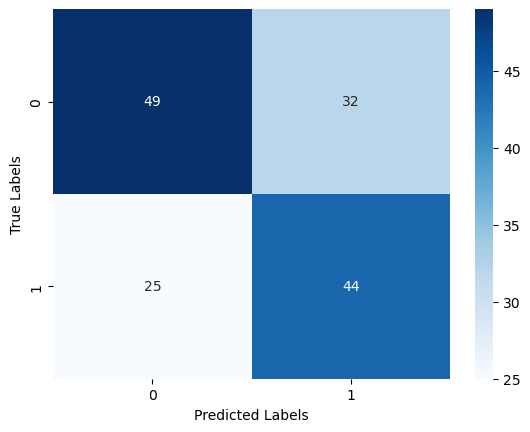

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


#calculate precision, recall and F1 score
confusion = confusion_matrix(y_true, y_pred)
sns.heatmap(confusion, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


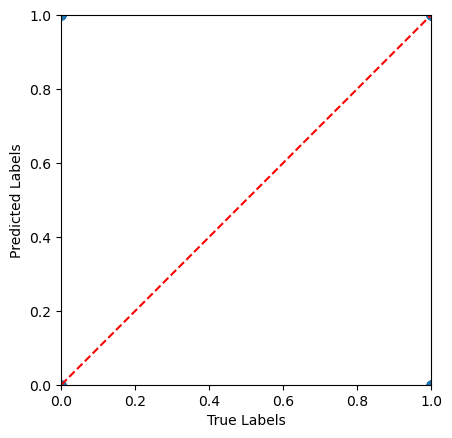

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# create scatter plot
fig, ax = plt.subplots()
ax.scatter(y_true, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls='--', c='red')
ax.set_xlabel('True Labels')
ax.set_ylabel('Predicted Labels')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_aspect('equal')
plt.show()

Mode of areas of Interest

In [37]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(15, 6)
        self.fc2 = torch.nn.Linear(6, 1)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model =Net()

In [38]:
torch.save(model.state_dict(), 'model.pt')

In [39]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [40]:
# Input values
input_tensor = torch.tensor([[-1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]])

# Reshape input 
input_tensor = input_tensor.unsqueeze(0)

# Make prediction
output_tensor = model(input_tensor)
predicted_label = torch.round(torch.sigmoid(output_tensor)).squeeze()
print('Input data:\n', input_tensor)
print('Predictions:\n', predicted_label)
if predicted_label == 0:
    print("TBI-Neg")
else:
    print("TBI-Pos")


Input data:
 tensor([[[-1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
          15.]]])
Predictions:
 tensor(0., grad_fn=<SqueezeBackward0>)
TBI-Neg


In [41]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))

   Actual Predicted
0     1.0     [0.0]
1     0.0     [1.0]
2     0.0     [0.0]
3     0.0     [0.0]
4     0.0     [1.0]
5     1.0     [1.0]
6     0.0     [0.0]
7     0.0     [0.0]
8     1.0     [1.0]
9     1.0     [1.0]


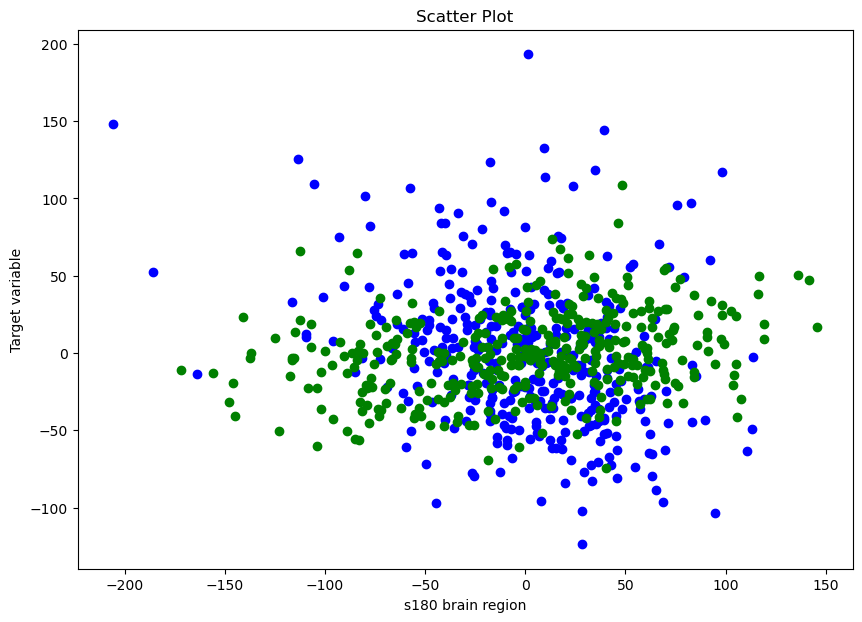

In [42]:
data = pd.read_csv('combined_data.csv')
x = data_pos['s180']
y = data.iloc[:, 0].values
#Create the scatter plot

plt.subplots(figsize=(10, 7))
colors = ['blue', 'green']
plt.scatter(X[y==0, 0], X[y==0, 1], c=colors[0], label='TBI neg')
plt.scatter(X[y==1, 0], X[y==1, 1], c=colors[1], label='TBI pos')
# Set the title and axis labels
plt.title('Scatter Plot')
plt.xlabel('s180 brain region')
plt.ylabel('Target variable')

# Show the plot
plt.show()

Plots for the above set of data

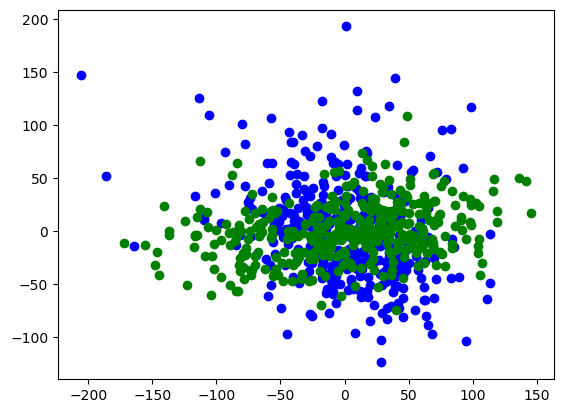

In [44]:
# Load data
data = pd.read_csv('combined_data.csv')

# Separate features (X) and labels (y)
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

colors = ['blue', 'green']
plt.scatter(X[y==0, 0], X[y==0, 1], c=colors[0], label='TBI neg')
plt.scatter(X[y==1, 0], X[y==1, 1], c=colors[1], label='TBI pos')